Author: Nedal Mohammad

There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

As a senior data scientist at Cars4U, you have to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. For example, if the business knows the market price, it will never sell anything below it. 

The purpose of this notebook is to create a linear model to predict the prices of used cars in the Indian Market. 

Objectives:
1. Explore and visualize the dataset.
2. Build a linear regression model to predict the prices of used cars.
3. Generate a set of insights and reccomendations that will help the buisness.


In [1]:
'''This is where all imports for the entire notebook will be'''
#imports for data manipulation
import pandas as pd
import numpy as np

#imports for visualization
import seaborn as sns
import matplotlib.pyplot as plt

#imports for modeling
from sklearn.model_selection import train_test_split #split the data for evaluation
from sklearn.linear_model import LinearRegression #the actual model package
from sklearn.metrics import mean_squared_error #evaluation metric
from sklearn.metrics import r2_score #evaluation metric
from sklearn.metrics import mean_absolute_error #evaluation metric
from sklearn.preprocessing import StandardScaler #used for z transformation
from scipy import stats #used for outlier detection

#random imports
import warnings
warnings.filterwarnings('ignore')

In [2]:
#removes the limit for the number of displayed rows in a pandas dataframe:
pd.set_option('display.max_rows', 100)

#Load in the data
data=pd.read_csv('used_cars_data.csv')
print(f'There are {data.shape[0]} rows and {data.shape[1]} columns.')

There are 7253 rows and 14 columns.


Data Dictionary:
1. S.No. : Serial Number
2. Name : Name of the car which includes Brand name and Model name
3. Location : The location in which the car is being sold or is available for purchase Cities
4. Year : Manufacturing year of the car
5. Kilometers_driven : The total kilometers driven in the car by the previous owner(s) in KM.
6. Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
7. Transmission : The type of transmission used by the car. (Automatic / Manual)
8. Owner : Type of ownership
9. Mileage : The standard mileage offered by the car company in kmpl or km/kg
10. Engine : The displacement volume of the engine in CC.
11. Power : The maximum power of the engine in bhp.
12. Seats : The number of seats in the car.
13. New_Price : The price of a new car of the same model in INR Lakhs.(1 Lakh = 100, 000)
14. Price : The price of the used car in INR Lakhs (1 Lakh = 100, 000)
 

In [3]:
#take a peak at the data
data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


Observations:
1. Mileage is reported in multiple units, may be correlated with Fuel_Type
2. Many values are missing in New_Price column
3. S.No. Column appears to be a mimic of the pandas index, So it will be removed.

In [4]:
#This column contains no useful information, so it will be dropped
data.drop(['S.No.'],axis=1,inplace=True)
data.tail() # To verify the column was dropped

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 736.8+ KB


Do Not Contain Missing Values:

0. Name is a string with datatype object, which is fine as it probably wont be useful in modeling.
1. Location is a string with datatype object, -> change to categoric.
2. Year is a number stored as int64, this is fine because linear regression could not handle date time object.
3. Kilometers_Driven is a number stored as int64, which is fine.
4. Fuel_Type is a categorical string stored as object, Convert to categoric
5. Transmission is a categorical string stored as object, Convert to categoric
6. Owner_Type is a categorical string stored as object, Convert to categoric
Contain Missing Values:
7. Mileage is a number stored as object. Entries contain the units with the amount. Convert to int64. Only 2 values are missing, I will investigate why these values are missing.
8. Engine is a number stored as object. Entries are in cubic centimeters, Remove units and store as int64. 46 Rows are missing this value
9. Power is a number stored as object. Entries are in brake horse power, remove units and store as float64. 46 rows are missing this value. 
10. Seats is a number stored as float 64, which is fine but consider converting to int64 to save memory. There are 53 missing values for the number of seats.
11. New_price is a number stored as object. Entries contain the currency with the amount. Remove units, and convert to float64. This column is also almost entirely missing from the dataset. 6247/7253 rows are missing a value in this column. Consider dropping this column. 
12. Price is a number stored as a float64, which is fine.

In [6]:
#obtaining a missing value count per column and sorting it.
data.isnull().sum().sort_values(ascending=False)

New_Price            6247
Price                1234
Seats                  53
Power                  46
Engine                 46
Mileage                 2
Owner_Type              0
Transmission            0
Fuel_Type               0
Kilometers_Driven       0
Year                    0
Location                0
Name                    0
dtype: int64

Because almost all values for New_Price are null, i will drop this column

In [7]:
data.drop(['New_Price'],axis=1,inplace=True)

# Planning Preprocessing:

Because of my domain knowledge surrounding cars. Earlier, I immediately noticed that there were some strange fuel types listed. And I also noticed some indicators that there was a correlation between the fuel type and the units that the mileage column was reported in. Because I need to find a way to somehow standardize the mileage column for analysis, I will take a moment to investigate this here before going into the preprocessing involved with each column.

In [8]:
data['Fuel_Type'].unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric'], dtype=object)

Here we can see that the unique fuel types in the DataFrame are: 'CNG', 'Diesel', 'Petrol', 'LPG', 'Electric'. I had never heard of CNG or LPG used as a fuel in cars so I took a moment to look these acronyms up.
1. CNG - Compressed Natural Gas (methane)
2. LPG - Liquefied Petroleum Gas (mix of propane and butane)
We can also see a fuel type called Electric, and I am immediately curious how the mileage is reported for this column(I would personally use KWh/km), as we had some NaN values in mileage. I will also look at each of the other fuel types and determine if the units used in mileage depend on the fuel type.

In [9]:
data[data['Fuel_Type' ] == 'Electric']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0,13.00
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0,12.75


In [10]:
'''
This shows that 0 values were reported for mileage 
and only 1 value is reported for new_price
'''
data[data['Fuel_Type' ] == 'Electric'].count()

Name                 2
Location             2
Year                 2
Kilometers_Driven    2
Fuel_Type            2
Transmission         2
Owner_Type           2
Mileage              0
Engine               2
Power                2
Seats                2
Price                2
dtype: int64

There are two Cars in the database that run on electric fuel type and the mileage for these rows is NaN! This means we found a pattern in the missingness. All of the missing values for mileage correspond to electric cars.

In [11]:
'''
This block of code uses a for-loop to compute the number of times each unit type
is used in the mileage column
is used in each category of fuel type. 
'''
def determine_units_mileage(Fuel_Type):
    count=data[data['Fuel_Type'] == Fuel_Type]['Mileage'].count() #the total number of rows with this fuel type
    kmkg_count=0 #initializing counting variables to 0
    kmpl_count=0
    error=0
    for i in data[data['Fuel_Type'] == Fuel_Type]['Mileage']: #for each row, check whether it ends with km/kg or kmpl
        if i.split()[1]=='km/kg':
            kmkg_count+=1
        elif i.split()[1]=='kmpl':
            kmpl_count+=1
        else:
            error+=1 #if it ends with something else, report an error
    print(f'There are {kmkg_count} values for the {Fuel_Type} fuel type where the mileage column is reported in km/kg units.')
    print(f'There are {kmpl_count} values for the {Fuel_Type} fuel type where the mileage column is reported in kmpl units.')
    print(f'This did not work for {error} rows.')
    print(f'There are {count} rows with fuel type {Fuel_Type}')

In [12]:
determine_units_mileage('CNG')


There are 62 values for the CNG fuel type where the mileage column is reported in km/kg units.
There are 0 values for the CNG fuel type where the mileage column is reported in kmpl units.
This did not work for 0 rows.
There are 62 rows with fuel type CNG


Here, we can see that if a car uses CNG fuel type, then its mileage will be reported in km/kg every single time. I will do the same for the other fuel types to verify a pattern

In [13]:
determine_units_mileage('LPG')

There are 12 values for the LPG fuel type where the mileage column is reported in km/kg units.
There are 0 values for the LPG fuel type where the mileage column is reported in kmpl units.
This did not work for 0 rows.
There are 12 rows with fuel type LPG


After looking through LPG fuel type subset of the DataFrame, I determined that every value for mileage is reported in km/kg. This is good to know.

In [14]:
determine_units_mileage('Diesel')

There are 0 values for the Diesel fuel type where the mileage column is reported in km/kg units.
There are 3852 values for the Diesel fuel type where the mileage column is reported in kmpl units.
This did not work for 0 rows.
There are 3852 rows with fuel type Diesel


In [15]:
determine_units_mileage('Petrol')

There are 0 values for the Petrol fuel type where the mileage column is reported in km/kg units.
There are 3325 values for the Petrol fuel type where the mileage column is reported in kmpl units.
This did not work for 0 rows.
There are 3325 rows with fuel type Petrol


Now we have determined:
1. if the fuel type is CNG or LPG, the mileage column is reported in kg/km
2. if the fuel type is Diesel or Petrol, the mileage column is reported in kmpl
3. if the fuel type is Electric, there is no value in the mileage column

Action to take:
It probably would not be reasonable to convert one to the other using the density of the fuel. After some reading, I believe this would not make the mileage column useful to ML algorithms. It would most likely skew the mean between two massive peaks. This is because converting km/kg to kmpl for a low density fuel results in a very small value for kmpl. Instead I will try to convert all values into cost in Rupees/km. This will give a strong meaning to the column, as it represents to cost to drive the car. This will be involved with feature engineering section

In [16]:
data['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

Because there are only 2 values here, we can convert this column to a numeric easily by one hot encoding.

In [17]:
data['Owner_Type'].unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

This owner_type column will have to be one-hot encoded.

I will now verify that every value in the power and engine columns is reported in consistent units. This will allow me to simply drop the units.

In [18]:
count=0 #initialize my count of rows using bhp unit to 0
for i in data['Power']:
    if str(i).endswith(' bhp')==True: #if the row ends with 'bhp', add 1 to count
        count+=1
print(count, 'rows report using bhp as the units, which equals the number of non-null values reported earlier')

7207 rows report using bhp as the units, which equals the number of non-null values reported earlier


Because all rows in the Power column use the same units, the units can safely be dropped, and that is how I will preprocess this data.

In [19]:
count=0 #initialize my count of rows using CC unit to 0
for i in data['Engine']:
    if str(i).endswith('CC')==True: #if the row ends with 'CC', add 1 to count
        count+=1
print(count, 'rows report using CC as the units, which equals the number of non-null values')

7207 rows report using CC as the units, which equals the number of non-null values


Because all rows in Engine column use the same units, we can safely and simply drop the units for our preprocessing steps. 

### Removing units from Engine, Mileage, and Power columns

In [20]:
def remove_units(value):
    '''
    Remove the units from something of the form '678 CC' or '654 bhp' so that it becomes the form
    '678' or '654'. also change the data type
    '''
    if isinstance(value, str): #check if the cell is a string
        if value.lower().split()[0]=='null': #if the cell is a string, and i split it and the first elemnt is 'null'
            return np.nan #return not a number
        #the above case occurs in the power column for some values only
        else:
            return float(value.lower().split()[0]) #otherwise the first element is a digit and i can return its float
    else:
        return np.nan #the last option in the data is that the cell already was NaN, so i return NaN
remove_units_cols = ['Engine', 'Power','Mileage'] #the columns i can safely remove units from
#can remove units from mileage now, because i have determined
#that the units for mileage correspond to the fuel type
for colname in remove_units_cols: #for each column i can safely remove units from
    data[colname]=data[colname].apply(remove_units) #apply the function i wrote called Remove_units

data.head()


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


We can see that the units are now removed from both the Engine and Power columns. Earlier I had noticed that these columns had equal number of NaN values, and they all corresponded to eachother. But upon further investigation there are some instances when the Power column is reported as 'null bhp' before transformation. This means that sometimes I know Engine value but do not know the Power value. From domain knowledge, i suspect these variables to be highly correlated. So i will consider to attempt to fill values in the power column that are NaN if I have a value in the Engine column using a straight line fit. First I must verify a correlation. We will come back to this and for now continue doing general preprocessing on columns before attempting to fill missing values in columns.

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   float64
 8   Engine             7207 non-null   float64
 9   Power              7078 non-null   float64
 10  Seats              7200 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 680.1+ KB


## Fixing the Data Types

In [22]:
data['Location']=data['Location'].astype('category')
data['Fuel_Type']=data['Fuel_Type'].astype('category')
data['Owner_Type']=data['Owner_Type'].astype('category')
data['Name']=data['Name'].astype('category') 
data['Transmission']=data['Transmission'].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               7253 non-null   category
 1   Location           7253 non-null   category
 2   Year               7253 non-null   int64   
 3   Kilometers_Driven  7253 non-null   int64   
 4   Fuel_Type          7253 non-null   category
 5   Transmission       7253 non-null   category
 6   Owner_Type         7253 non-null   category
 7   Mileage            7251 non-null   float64 
 8   Engine             7207 non-null   float64 
 9   Power              7078 non-null   float64 
 10  Seats              7200 non-null   float64 
 11  Price              6019 non-null   float64 
dtypes: category(5), float64(5), int64(2)
memory usage: 536.1 KB


# Exploratory Data Analysis:

I will start with a statistical summary of the data

In [23]:
data.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,7253.000000,7.253000e+03,7251.000000,7207.000000,7078.000000,7200.000000,6019.000000
mean,2013.365366,5.869906e+04,18.141580,1616.573470,112.765214,5.279722,9.479468
std,3.254421,8.442772e+04,4.562197,595.285137,53.493553,0.811660,11.187917
min,1996.000000,1.710000e+02,0.000000,72.000000,34.200000,0.000000,0.440000
25%,2011.000000,3.400000e+04,15.170000,1198.000000,75.000000,5.000000,3.500000
50%,2014.000000,5.341600e+04,18.160000,1493.000000,94.000000,5.000000,5.640000
75%,2016.000000,7.300000e+04,21.100000,1968.000000,138.100000,5.000000,9.950000
max,2019.000000,6.500000e+06,33.540000,5998.000000,616.000000,10.000000,160.000000


1. Engine, Power, and Price are skewed. Because the Mean > Median these are all positively skewed
2. I notice the range of values in Engine, Power, and Price is very large. This indicates some cars may be SuperCars and appear as outliers in the dataset.

In [24]:
data.describe(include=["category"])

,Name,Location,Fuel_Type,Transmission,Owner_Type
count,7253,7253,7253,7253,7253
unique,2041,11,5,2,4
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First
freq,55,949,3852,5204,5952


1. There are too many unique names to encode so I will probably not use this feature in modeling, perhaps I can extract a new feature from it.
2. All other columns have an appropriate amount of unique values for one hot encoding.

## Univariate Analysis

In [25]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = False, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram
    
def perc_on_bar(data, z):
    """
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    """

    total = len(data[z])  # length of the column
    plt.figure(figsize=(15, 5))
    plt.xticks(rotation=45)
    ax = sns.countplot(data[z], palette="Paired")
    for p in ax.patches:
        percentage = "{:.1f}%".format(
            100 * p.get_height() / total
        )  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05  # width of the plot
        y = p.get_y() + p.get_height()  # hieght of the plot

        ax.annotate(percentage, (x, y), size=10)  # annotate the percantage
    plt.show()  # show the plot

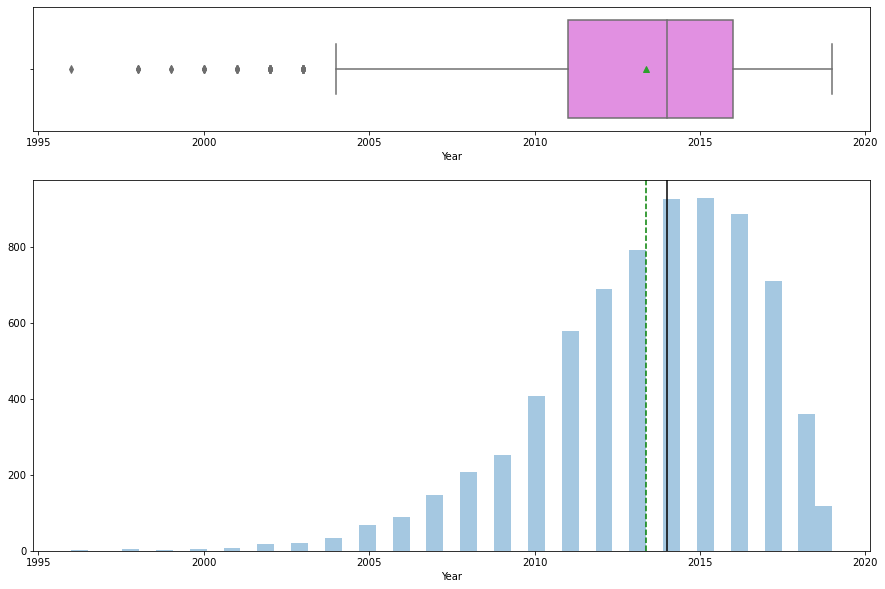

In [26]:
histogram_boxplot(data["Year"])

Close to a normal distribution for Year column.

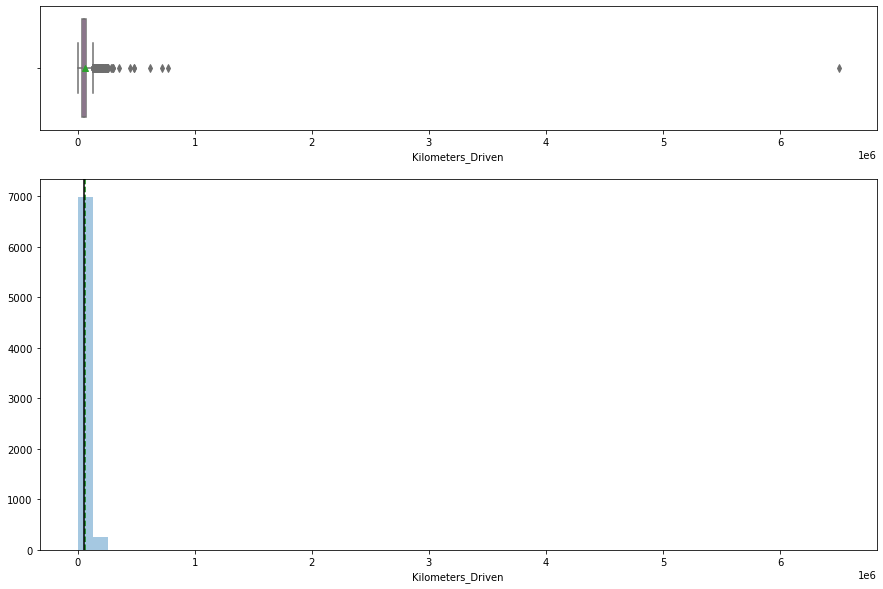

In [27]:
histogram_boxplot(data["Kilometers_Driven"])

There is a heavy right skew in Kilometers_Driven, and an outlier that needs to be removed.

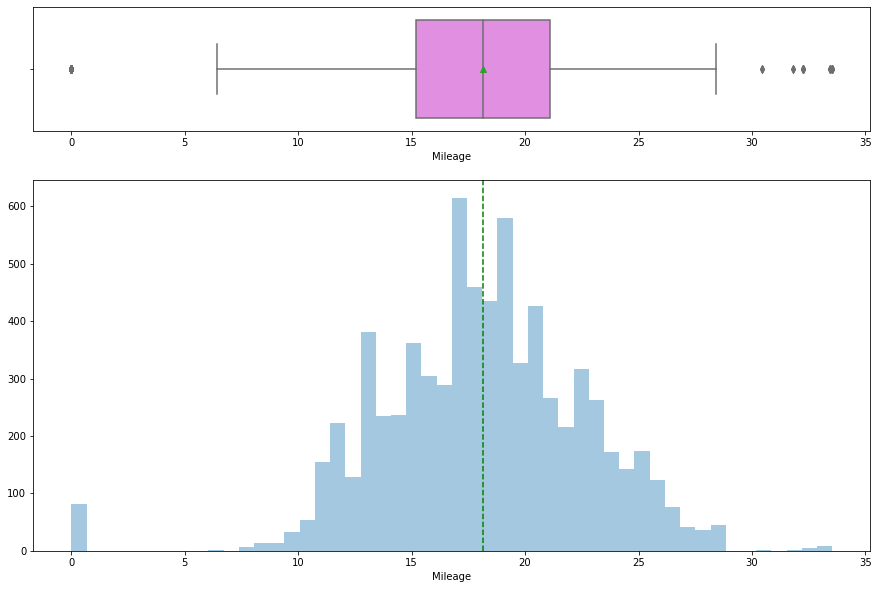

In [28]:
histogram_boxplot(data["Mileage"])

Shows a normal distribution with no skew.

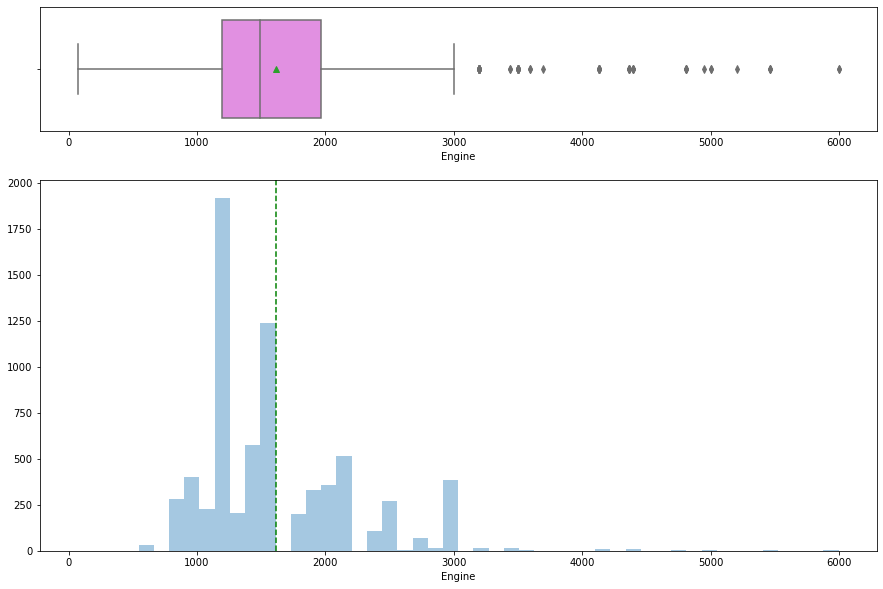

In [29]:
histogram_boxplot(data["Engine"])

Right skewed, I notice some rare cars are very powerful and appear as outliers.

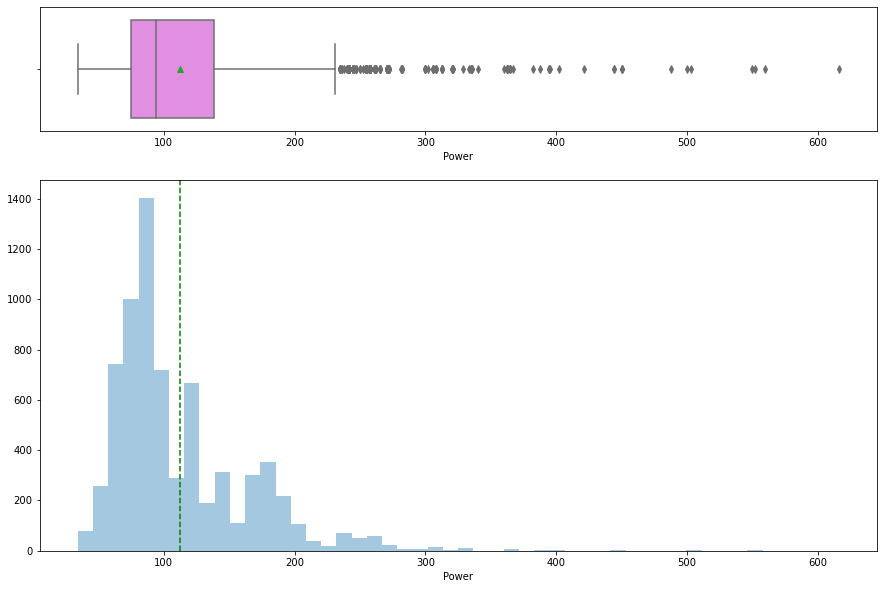

In [30]:
histogram_boxplot(data["Power"])

Right skewed, I notice some rare cars are very powerful and appear as outliers.

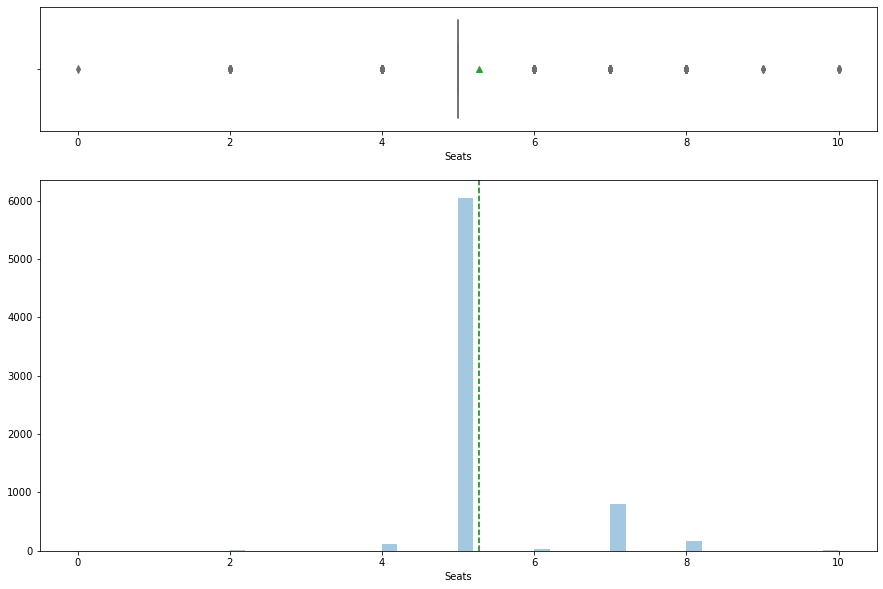

In [31]:
histogram_boxplot(data["Seats"])

A vast majority of cars have 5 seats, while one has 0 seats. I think this is an outlier in the dataset that needs to be fixed.

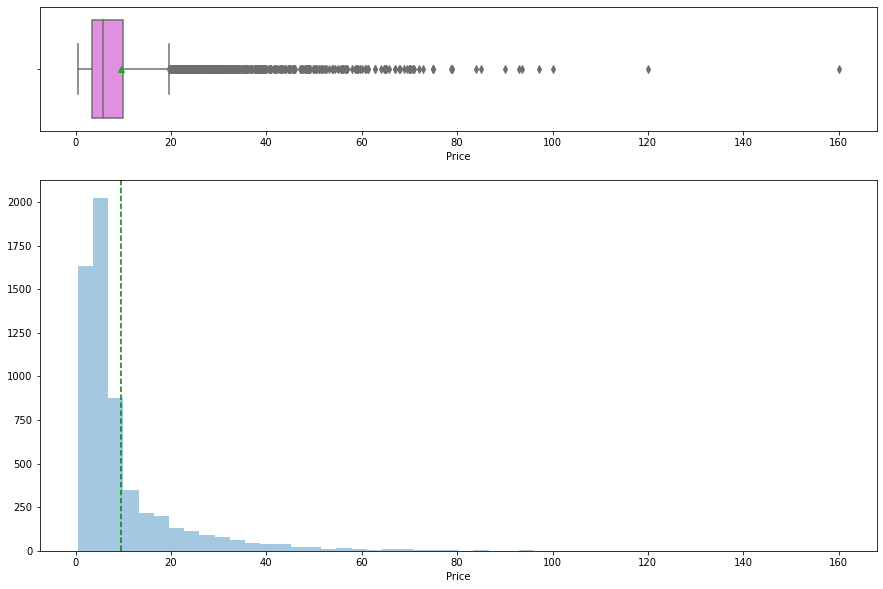

In [32]:
histogram_boxplot(data["Price"])

The heavy right skew matches that of power and Engine leading me to believe that more powerful cars are rare and appear as  expensive outliers here.

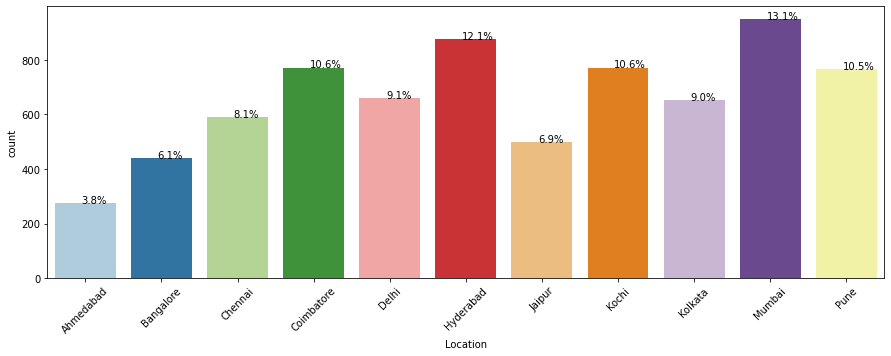

In [33]:
perc_on_bar(data, 'Location')

A substantial number of cars in each city. Most cars are in the most populated cities.

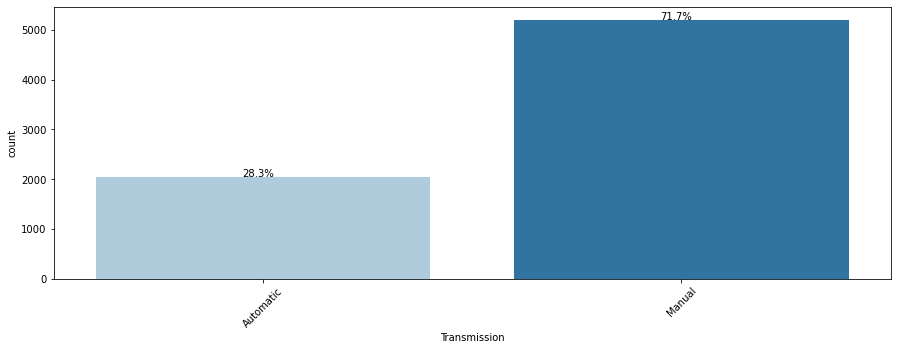

In [34]:
perc_on_bar(data, 'Transmission')

Most cars in the used market are Manual transmission.

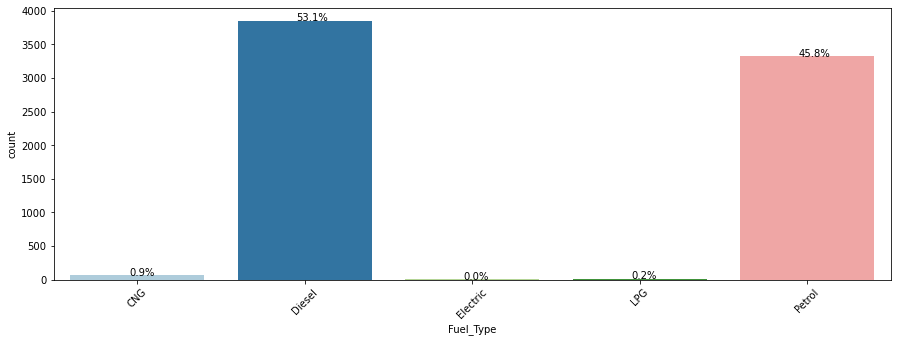

In [35]:
perc_on_bar(data, 'Fuel_Type')

Almost all cars (99%) are Diesel or Petrol powered, only 2 cars are electric and LPG and CNG fuel types likewise make up only a small percentage of the cars

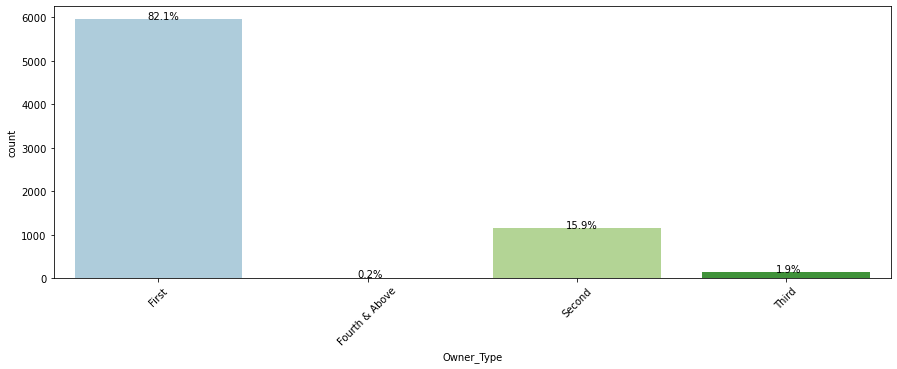

In [36]:
perc_on_bar(data, 'Owner_Type')

Most used cars have only had 1 or 2 previous owners.

## Bivariate Analysis

In [37]:
data.corr()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
Year,1.000000,-0.187859,0.322463,-0.054693,0.013432,0.008216,0.305327
Kilometers_Driven,-0.187859,1.000000,-0.069122,0.094818,0.030164,0.090221,-0.011493
Mileage,0.322463,-0.069122,1.000000,-0.593569,-0.531771,-0.310632,-0.306593
Engine,-0.054693,0.094818,-0.593569,1.000000,0.859771,0.399262,0.658354
Power,0.013432,0.030164,-0.531771,0.859771,1.000000,0.095905,0.772566
Seats,0.008216,0.090221,-0.310632,0.399262,0.095905,1.000000,0.052225
Price,0.305327,-0.011493,-0.306593,0.658354,0.772566,0.052225,1.000000


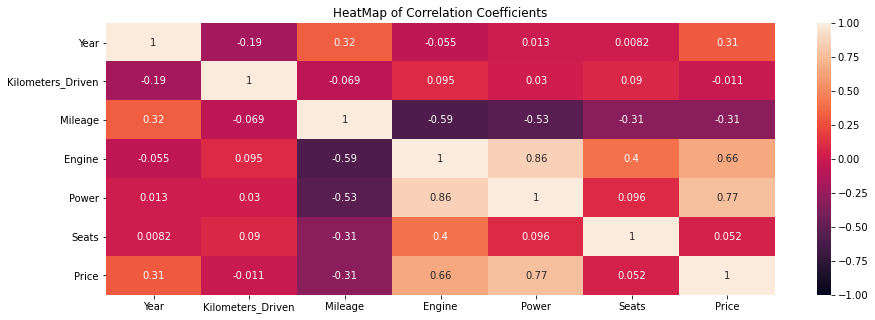

In [38]:
plt.figure(figsize=(15,5))
sns.heatmap(data.corr(),annot=True,vmax=1,vmin=-1)
plt.title("HeatMap of Correlation Coefficients")
plt.show()

Price is highly correlated with Power, Engine, Mileage, Year

I will use a pairplot to visualize the numeric distributions:

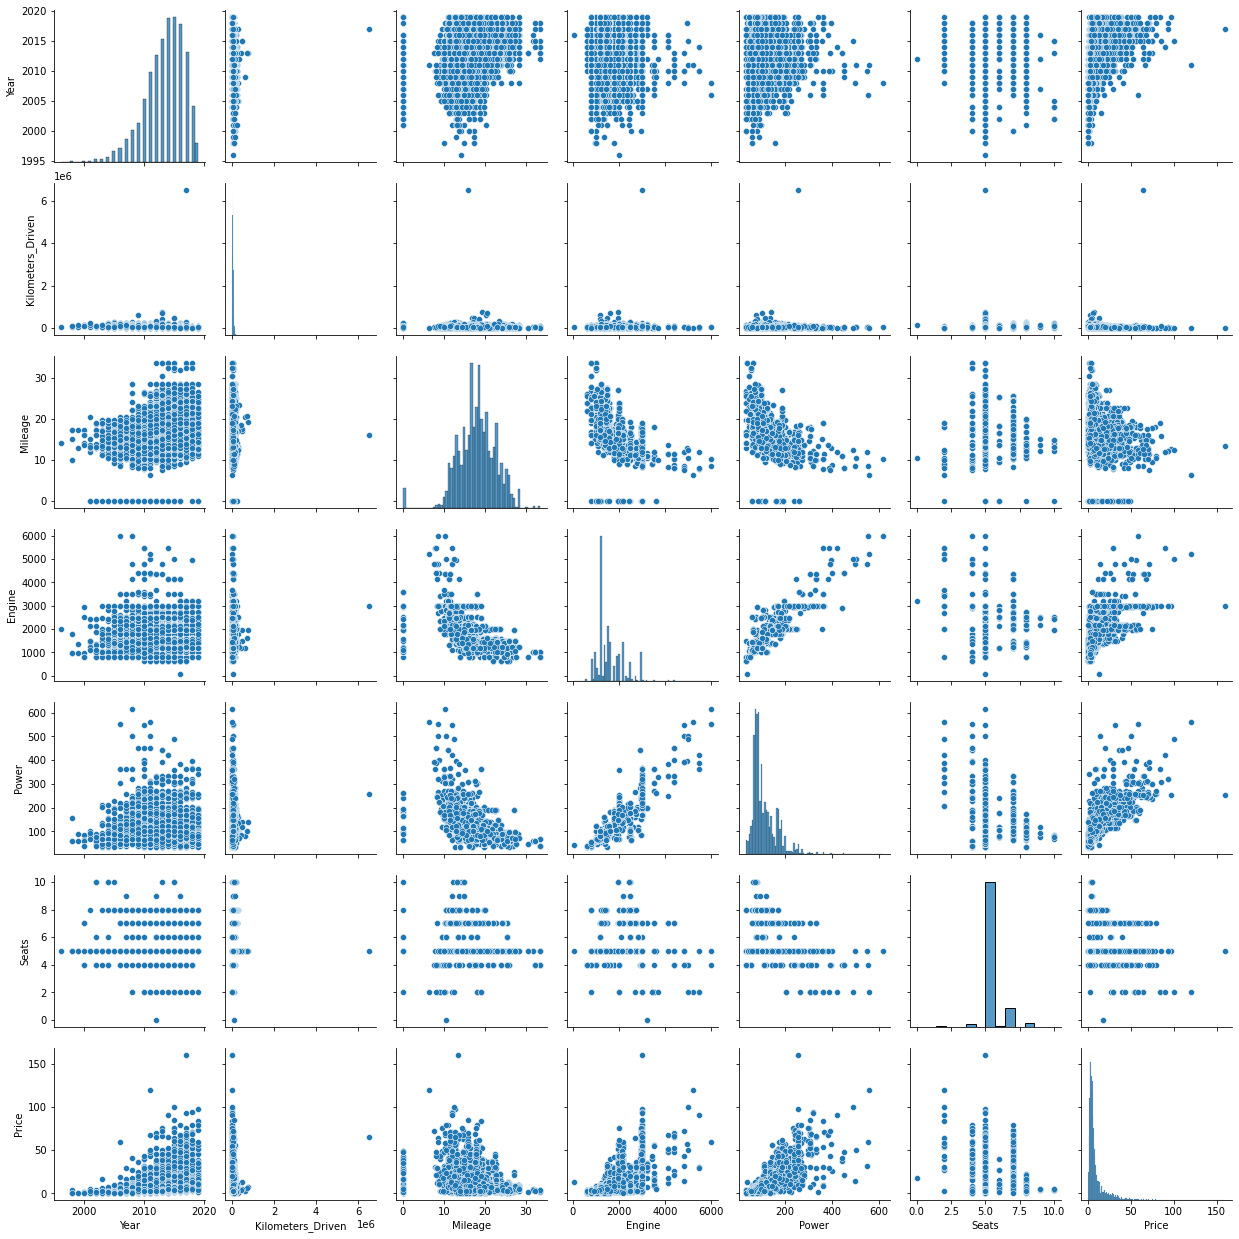

In [39]:
sns.pairplot(data=data)
plt.show()

Lets look at the last column here to see first how variables influence price:
1. Year - Newer cars are more expensive
2. Kilometers_Driven - Cars with more Km driven are cheaper
3. Mileage - Mileage tends downward as cost increases
4. Engine -  If a car has an engine with a high displacement, it becomes more expensive.
5. Power - More powerful cars are more expensive.
6. Seats - Cars with many seats are cheap. Otherwise, there is a pretty even distribution

Other Correlations/notes:
1. Engine and Power are highly linearly correlated.
2. More Powerful cars have lower mileage
3. There appears to be a hefty outlier in the Kilometers_Driven column
4. There appears to be a car in the data with 0 seats.

Now to visualize categoric variable influence on Price:

<AxesSubplot:xlabel='Location', ylabel='Price'>

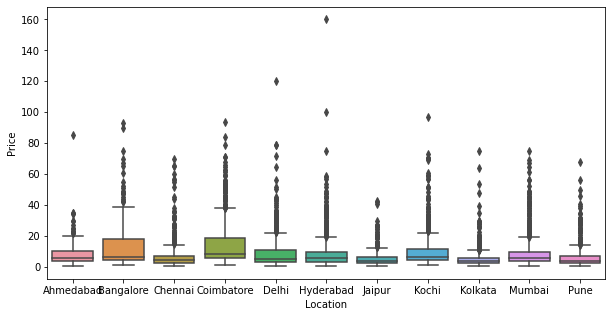

In [40]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Location", y="Price", data=data)

I notice cities with the most cars have the highest variation in price

<AxesSubplot:xlabel='Transmission', ylabel='Price'>

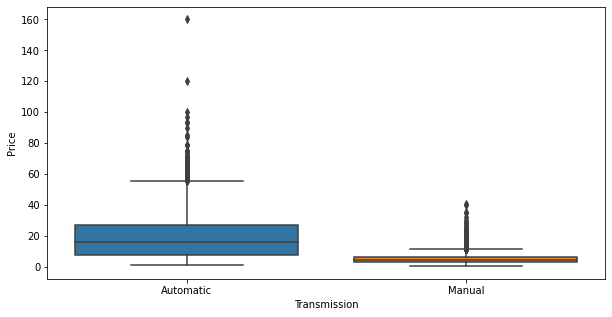

In [41]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Transmission", y="Price", data=data)

Automatic cars tend to cost more

<AxesSubplot:xlabel='Fuel_Type', ylabel='Price'>

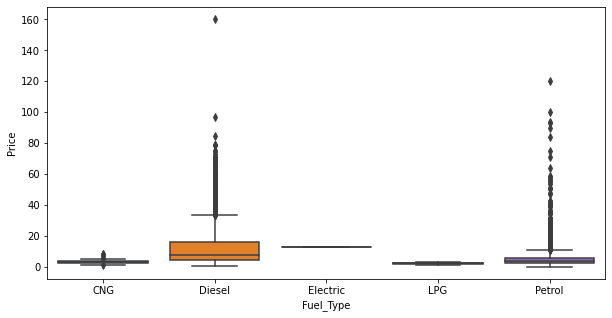

In [42]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Fuel_Type", y="Price", data=data)

Diesel and Petrol have expensive outliers while electric cars have a high median price.
LPG and CNG cars in general cost the least.

<AxesSubplot:xlabel='Owner_Type', ylabel='Price'>

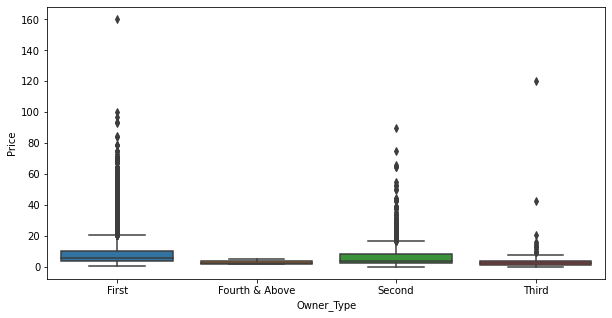

In [43]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Owner_Type", y="Price", data=data)

The more owners a car has had, the cheaper it becomes.

# Preprocessing:

## Fixing some outliers

In [44]:
data['Kilometers_Driven'].sort_values(ascending=False).head()

2328    6500000
340      775000
1860     720000
358      620000
2823     480000
Name: Kilometers_Driven, dtype: int64

At index 2328 we have an error in the data showing that a car was driven 6.5 million km. I will remove this data point.

In [45]:
data.drop(2328, inplace=True)

In [46]:
data['Kilometers_Driven'].sort_values(ascending=False).head()

340     775000
1860    720000
358     620000
2823    480000
3092    480000
Name: Kilometers_Driven, dtype: int64

We can see now that this row has been dropped.

### Fixing bad data in seats column

In [47]:
data['Seats'].unique()

array([ 5.,  7.,  8.,  4.,  6.,  2., nan, 10.,  9.,  0.])

no car should be listed with 0 seats. I will investigate.

In [48]:
data[data['Seats'] == 0]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
3999,Audi A4 3.2 FSI Tiptronic Quattro,Hyderabad,2012,125000,Petrol,Automatic,First,10.5,3197.0,NaN,0.0,18.0


Here we can see this car which is recorded as having 0 seats in the data frame. I looked up this car on google and determined it was an error in the data and should actually be 5 seats. So now I will change it.

In [49]:
data['Seats']=data['Seats'].replace(0.0,5) #because there is only 1 value of 0 i can use this replace all fucntion here
data['Seats'].unique()

array([ 5.,  7.,  8.,  4.,  6.,  2., nan, 10.,  9.])

## Feature Engineering

### Create New Feature Company 

In [50]:
data['Company'] = [x.split()[0].capitalize() for x in data['Name']]
#the company name seems to be the first word in the name column, 
#we use capitalize() on it so that strings with consistent lettering and inconsistent caps/lowers become equal

In [51]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi


In [52]:
data['Company'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-benz', 'Bmw', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'Force', 'Bentley', 'Lamborghini',
       'Hindustan', 'Opelcorsa'], dtype=object)

After a careful inspection, everything here seems to be in order.

In [53]:
data['Company']=data['Company'].astype('category')

Company may be used in analysis therefore I will change the dtype to category

###### Remove company from old name column

In [54]:
data['Name']=[x.split()[1:] for x in data['Name']]
#This will return a list of strings which would be good for NLP as it would be tokenized

In [55]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company
0,"[Wagon, R, LXI, CNG]",Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti
1,"[Creta, 1.6, CRDi, SX, Option]",Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai
2,"[Jazz, V]",Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda
3,"[Ertiga, VDI]",Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti
4,"[A4, New, 2.0, TDI, Multitronic]",Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi


In [56]:
#because we are not interested in performing an NLP model right now, I will return the name column to a full string 
#instead of a list of strings for presentation purposes only.
def listToStrings(lisst):
    '''This function adds a space between every word in a list of strings, 
    forming a new single string representing the entire list'''
    str1=' '
    return str1.join(lisst)
listToStrings(['car','is','on','fire']) #testing the function

'car is on fire'

In [57]:
data['Name']=[listToStrings(x) for x in data['Name']] #applying the function to the name column yields:

In [58]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company
0,Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti
1,Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai
2,Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda
3,Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti
4,A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi


Now the company name column is seperate from names and the company has been dropped from the names column.

### Creating new feature cost in rupees / km 

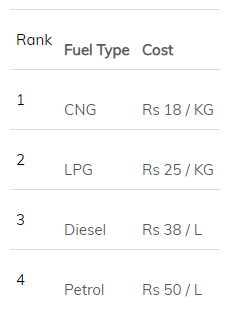
https://www.cartrade.com/blog/2009/auto-guides/petrol-diesel-cng-or-lpg-we-help-you-choose-2.html
I found this resource which provides the average cost of using each fuel type in rupees through some research and I will use this table to engineer a new feature to replace mileage. The feature will be cost in Rupees/km of distance travelled with the car and only accounts for fuel costs.

In [59]:
#create a list of conditions which can be used with the np.select() command
conditions = [
    (data['Fuel_Type']=='CNG'),
    (data['Fuel_Type']=='LPG'),
    (data['Fuel_Type']=='Diesel'),
    (data['Fuel_Type']=='Petrol'),
    (data['Fuel_Type']=='Electric'),
]
#create a list of values corresponding to conditions which can be used with the np.select() command
values = [18,25,38,50,np.nan]

#create a new column and use np.select to assign values for each condition
data['Cost/unit fuel']=np.select(conditions,values)
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company,Cost/unit fuel
0,Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti,18.0
1,Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,38.0
2,Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda,50.0
3,Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti,38.0
4,A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi,38.0


Now that we have a cost/unit fuel column we can use to calculate the new column cost(in rupees)/km driven.

In [60]:
for ind, row in data.iterrows():
    #for each row multiply the mileage column with cost/unit fuel column and store in new column
    #cost (in rupees)/km
    data.loc[ind, 'cost(in rupees)/km'] = row['Mileage'] * row['Cost/unit fuel']
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company,Cost/unit fuel,cost(in rupees)/km
0,Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti,18.0,478.80
1,Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,38.0,747.46
2,Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda,50.0,910.00
3,Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti,38.0,789.26
4,A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi,38.0,577.60


Now that I have the new column, I will still keep the mileage column i used to create this column because i'd like to learn from comparing model performances (with new feature and without new feature) later on. However, i will drop the cost column i used as it holds no value beyonjd the fuel_type column

In [61]:
data.drop(['Cost/unit fuel'], axis=1,inplace=True) #this column has served its purpose and is no longer needed

In [62]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company,cost(in rupees)/km
0,Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti,478.80
1,Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,747.46
2,Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda,910.00
3,Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti,789.26
4,A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi,577.60


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7252 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Name                7252 non-null   object  
 1   Location            7252 non-null   category
 2   Year                7252 non-null   int64   
 3   Kilometers_Driven   7252 non-null   int64   
 4   Fuel_Type           7252 non-null   category
 5   Transmission        7252 non-null   category
 6   Owner_Type          7252 non-null   category
 7   Mileage             7250 non-null   float64 
 8   Engine              7206 non-null   float64 
 9   Power               7077 non-null   float64 
 10  Seats               7199 non-null   float64 
 11  Price               6018 non-null   float64 
 12  Company             7252 non-null   category
 13  cost(in rupees)/km  7250 non-null   float64 
dtypes: category(5), float64(6), int64(2), object(1)
memory usage: 924.3+ KB


All dtypes are stored appropriately now, I have kept Name in the dtype object so I can distinguish it from usable features later.

## Missing Value Treatment

First I will drop all rows with a null target, as I can not use this data.

In [64]:
data=data[data['Price'].notna()]

In [65]:
data.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                 143
Seats                  42
Price                   0
Company                 0
cost(in rupees)/km      2
dtype: int64

Before I can create a model I must handle the missing values:

1. For mileage and cost(in rupees)/km I will use the median
2. For Engine, Power, Seats I will use the Average

## Compute missing values

In [66]:
data['Mileage'].fillna(data['Mileage'].median(), inplace=True)
data['cost(in rupees)/km'].fillna(data['cost(in rupees)/km'].median(), inplace=True)

In [67]:

data['Power'].fillna(data['Power'].mean(), inplace = True)
data['Engine'].fillna(data['Engine'].mean(), inplace = True)
data['Seats'].fillna(data['Power'].mean(), inplace = True)


In [68]:
data.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine                0
Power                 0
Seats                 0
Price                 0
Company               0
cost(in rupees)/km    0
dtype: int64

All missing values are now filled, and we can move onto feature scaling.

## Feature Scaling

In [69]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company,cost(in rupees)/km
0,Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti,478.80
1,Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,747.46
2,Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda,910.00
3,Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti,789.26
4,A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi,577.60


Features to scale: Kilometers_Driven, Mileage, Engine, Power, Seats, cost(in rupees)/km

In [70]:
scaler= StandardScaler()
data['Kilometers_Driven_scaled']=scaler.fit_transform(data[['Kilometers_Driven']])
data['Mileage_scaled']=scaler.fit_transform(data[['Mileage']])
data['Engine_scaled']=scaler.fit_transform(data[['Engine']])
data['Power_scaled']=scaler.fit_transform(data[['Power']])
data['Seats_scaled']=scaler.fit_transform(data[['Seats']])
data['cost(in rupees)/km_scaled']=scaler.fit_transform(data[['cost(in rupees)/km']])
data.drop(['Kilometers_Driven','Mileage','Engine','Power','Seats','cost(in rupees)/km'],axis=1,inplace=True)
data.head()

,Name,Location,Year,Fuel_Type,Transmission,Owner_Type,Price,Company,Kilometers_Driven_scaled,Mileage_scaled,Engine_scaled,Power_scaled,Seats_scaled,cost(in rupees)/km_scaled
0,Wagon R LXI CNG,Mumbai,2010,CNG,Manual,First,1.75,Maruti,0.378395,1.847600,-1.039637,-1.035154,-0.114493,-1.443537
1,Creta 1.6 CRDi SX Option,Pune,2015,Diesel,Manual,First,12.50,Hyundai,-0.440073,0.334976,-0.065155,0.243835,-0.114493,-0.153345
2,Jazz V,Chennai,2011,Petrol,Manual,First,4.50,Honda,-0.308062,0.014116,-0.704242,-0.461075,-0.114493,0.627225
3,Ertiga VDI,Chennai,2012,Diesel,Manual,First,6.00,Maruti,0.774428,0.575075,-0.622479,-0.459947,0.107177,0.047393
4,A4 New 2.0 TDI Multitronic,Coimbatore,2013,Diesel,Automatic,Second,17.74,Audi,-0.448786,-0.640699,0.578937,0.518279,-0.114493,-0.969067


## Comments on Outliers

Remaining outliers appear to be real cars that are just very powerful. Removing supercars from the dataset may be of use if the dealership does not intend to deal in supercars, however I will keep them for the sake of generality.

Now we can see all missing values are filled, features are scaled, and we are ready to build a model.

# Model Building

## Define Independant and dependant variables

In [71]:
ind_vars=data.drop(['Price','Name','Location'], axis=1) 
#all columns except for Price are possible features
#Location/Name dropped because I noticed these caused overfitting when making trial models.
dep_var=data[['Price']]

In [72]:
ind_vars.head()

,Year,Fuel_Type,Transmission,Owner_Type,Company,Kilometers_Driven_scaled,Mileage_scaled,Engine_scaled,Power_scaled,Seats_scaled,cost(in rupees)/km_scaled
0,2010,CNG,Manual,First,Maruti,0.378395,1.847600,-1.039637,-1.035154,-0.114493,-1.443537
1,2015,Diesel,Manual,First,Hyundai,-0.440073,0.334976,-0.065155,0.243835,-0.114493,-0.153345
2,2011,Petrol,Manual,First,Honda,-0.308062,0.014116,-0.704242,-0.461075,-0.114493,0.627225
3,2012,Diesel,Manual,First,Maruti,0.774428,0.575075,-0.622479,-0.459947,0.107177,0.047393
4,2013,Diesel,Automatic,Second,Audi,-0.448786,-0.640699,0.578937,0.518279,-0.114493,-0.969067


In [73]:
dep_var.head()

,Price
0,1.75
1,12.50
2,4.50
3,6.00
4,17.74


Everything looks good so far. Now we must encode all of the categorical variables. I will use a function for this:
1. (this cell is why the name column is stored as a object type. select_dtypes allows me to exclude it here)

In [74]:
def encode_cat_vars(x):
    x = pd.get_dummies(
        x,
        columns=x.select_dtypes(include=["category"]).columns.tolist(),
        drop_first=True,
    )
    return x
ind_vars_num = encode_cat_vars(ind_vars)

In [75]:
ind_vars_num.head()

,Year,Kilometers_Driven_scaled,Mileage_scaled,Engine_scaled,Power_scaled,Seats_scaled,cost(in rupees)/km_scaled,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,...,Company_Nissan,Company_Opelcorsa,Company_Porsche,Company_Renault,Company_Skoda,Company_Smart,Company_Tata,Company_Toyota,Company_Volkswagen,Company_Volvo
0,2010,0.378395,1.847600,-1.039637,-1.035154,-0.114493,-1.443537,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015,-0.440073,0.334976,-0.065155,0.243835,-0.114493,-0.153345,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2011,-0.308062,0.014116,-0.704242,-0.461075,-0.114493,0.627225,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2012,0.774428,0.575075,-0.622479,-0.459947,0.107177,0.047393,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2013,-0.448786,-0.640699,0.578937,0.518279,-0.114493,-0.969067,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
ind_vars_num.shape

(6018, 46)

Everything looks good, now we must split the data into a train and test set.

In [77]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    ind_vars_num, dep_var, test_size=0.3, random_state=1)

## Fitting Linear Model

In [78]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train, y_train)

LinearRegression()

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6018 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Name                       6018 non-null   object  
 1   Location                   6018 non-null   category
 2   Year                       6018 non-null   int64   
 3   Fuel_Type                  6018 non-null   category
 4   Transmission               6018 non-null   category
 5   Owner_Type                 6018 non-null   category
 6   Price                      6018 non-null   float64 
 7   Company                    6018 non-null   category
 8   Kilometers_Driven_scaled   6018 non-null   float64 
 9   Mileage_scaled             6018 non-null   float64 
 10  Engine_scaled              6018 non-null   float64 
 11  Power_scaled               6018 non-null   float64 
 12  Seats_scaled               6018 non-null   float64 
 13  cost(in rupees)/km_scaled  6018 n

In [80]:
#create a dataframe of coefficients and intercept in the model.
coef_df = pd.DataFrame(
    np.append(lin_reg_model.coef_.flatten(), lin_reg_model.intercept_),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df

,Coefficients
Year,9.451337e-01
Kilometers_Driven_scaled,-5.806226e-01
Mileage_scaled,-3.764946e+00
Engine_scaled,1.238442e+00
Power_scaled,4.352351e+00
Seats_scaled,-3.250373e-04
cost(in rupees)/km_scaled,3.512487e+00
Fuel_Type_Diesel,-9.377741e+00
Fuel_Type_Electric,-2.968079e+00
Fuel_Type_LPG,-4.067734e+00


Because all features are scaled and a linear model was used, these values can be interpretted as such (taking the first row (year) as an example):
---if the year of the car is increased by 1 then the price of the car will increase by 0.945 lakhs


Notable coefficients are:
1. Mileage_scaled
2. Engine_scaled
3. Power_scaled	
4. Fuel_Type_Petrol
5. Well known car company coefficients tend to be higher

Coefficients which are not useful:
1. Company_Opelcorsa
2. Company_Hindustan
3. Seats_scaled

## Model Performance Evaluation

In [81]:
#a function to calculate the adjusted R^2
# Adjusted R^2
def adj_r2(ind_vars, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = ind_vars.shape[0]
    k = ind_vars.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

#a function to output the results of model evaluation in the form of a pandas dataframe
# Model performance check
#credit to:Yash Saxena,pgpaiml
def model_perf(model, inp, out):

    y_pred = model.predict(inp)
    y_act = out.values

    return pd.DataFrame(
        {#Dictionary
            "RMSE": np.sqrt(mean_squared_error(y_act, y_pred)),
            "MAE": mean_absolute_error(y_act, y_pred),
            "R^2": r2_score(y_act, y_pred),
            "Adjusted R^2": adj_r2(inp, y_act, y_pred),
        },
        index=[0],
    )

In [82]:
print("Training Performance\n")
print(model_perf(lin_reg_model, x_train, y_train))

Training Performance

       RMSE      MAE       R^2  Adjusted R^2
0  5.330553  2.98145  0.772363      0.769849


In [83]:
print("Test Performance\n")
print(model_perf(lin_reg_model, x_test, y_test))

Test Performance

       RMSE       MAE       R^2  Adjusted R^2
0  5.339964  2.892905  0.770429      0.764425


Comment on the performance measures and if there is any need to improve the model or not:
1. The training performance and test performance are very similar. This indicates that the model is not overfitting
2. The model shows an R^2 of 77.2% in training and 76.9% in testing which means it explains about 77.2% and 76.9% of the variation in the train and test sets respectively. It is also good that these scores are comparable.
3. The MAE shows that our price prediction are off by about 2.9 lakh rupees on average. Which is kind of a lot.
4. Overall the model could use some improvements.

Author comments on improvements:
1. If the dealer is not interested in the dealing of supercars, many cars could be dropped from the data set and the model retrained so that many outliers are no longer present. This could allow for a more accurate model. 
2. Even if the dealer is interested in dealing with supercars, I think two seperate models are neccessary here simply because price values in super and non super cars are so drastically different it is very difficult to model them with a straight line.
3. A curved fit could be used to increase model performance, but would have to be very careful of overfitting.

# Conclusions

1. A predictive model has been built that can be used by used car dealerships in india to predict the average resale value of a car with an R^2 value of 0.772 on the training set.
2. This model can be used to predict car prices with a mean error of 2.89 lakhs
3. The factors that tend to affect car price most are the Power output of the engine, Engine displacement, Fuel Type, and Company name.
4. Using non linear transformations on some of the features may allow better prices to be predicted.

# Actionable Insights & Recommendations

In order to grow the buisness, I would reccomend the following:
1. Primarily look to purchase cars below the predicted price, so that it may be sold for a profit
2. Avoid cars with Fuel_Type as LPG or CNG as these cars sell for less and because there are not many of them, are also probably undesirable.
3. Only attempt to resell cars with 2 or less previous owners. 
4. Well known car brands are sold for more, and also most probably easier to sell.
5. Attempt to purchase and resell cars that have an Engine with high displacement, as these sell for more.
6. Attempt to purchase and resell cars that have an Engine with high power output, as these sell for more.

*Some functions used in Model Building were presented by Yash Saxena (pgpaiml) during a case study, and are used here.